In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# datanın totaldeki dağılımı
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

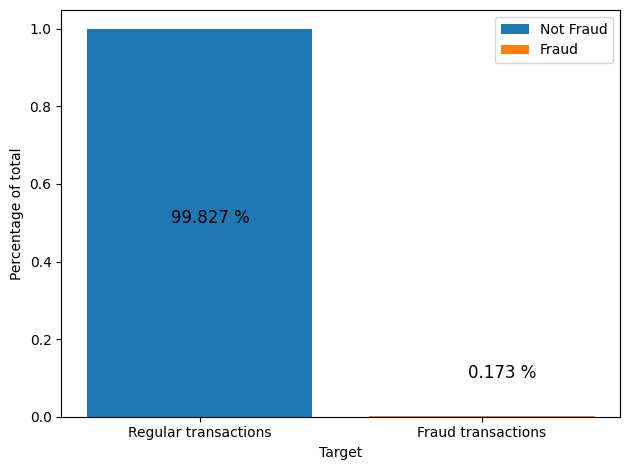

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio_ones = df.Class.mean()
ratio_zeros = (len(df) - df.Class.sum())/len(df)

plt.bar('Regular transactions', height=ratio_zeros, label='Not Fraud')
plt.bar('Fraud transactions', height=ratio_ones, label='Fraud')
plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()

In [7]:
df.shape

(284807, 31)

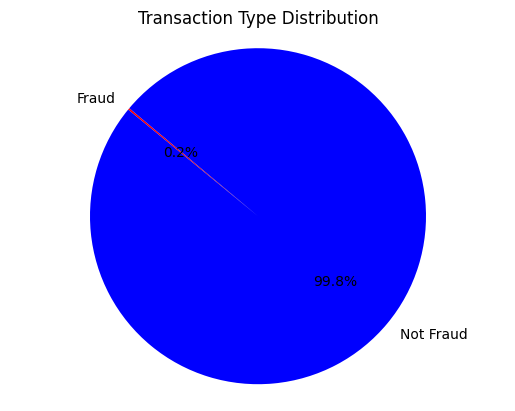

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dolandırıcılık ve normal işlemlerin oranlarını hesapla
ratios = [df.Class.mean(), 1 - df.Class.mean()]
labels = ['Fraud', 'Not Fraud']
colors = ['red', 'blue']
# Pasta grafiğini oluştur
plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Orta daireyi kapat
plt.axis('equal')
# Başlığı ekle
plt.title('Transaction Type Distribution')
# Grafiği göster
plt.show()

In [9]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


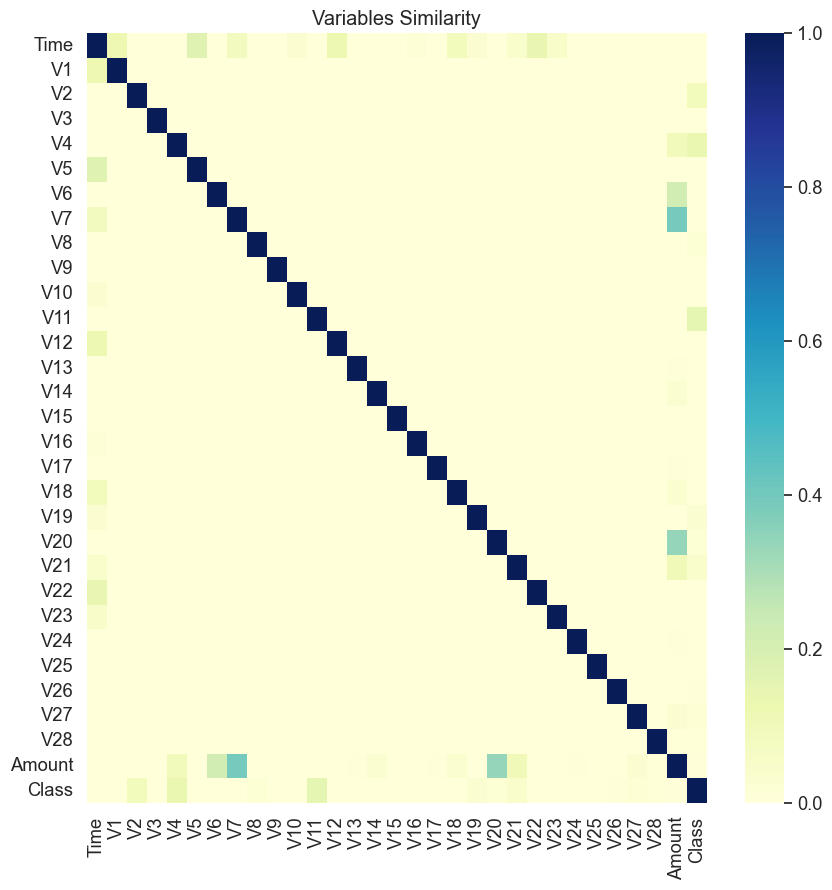

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
def plot_similarity(labels, features, rotation):
    corr = features.corr()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Variables Similarity")

plot_similarity(df.columns, df, 90)

<Axes: >

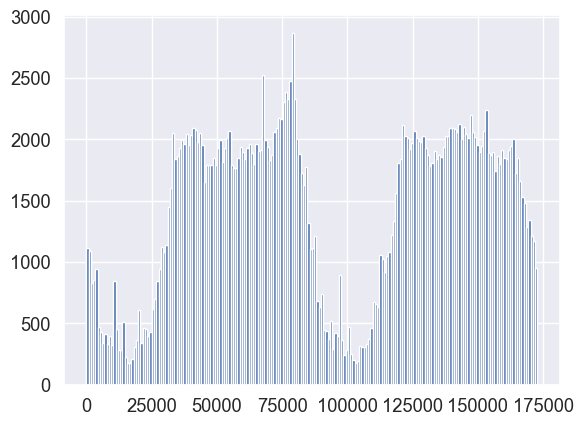

In [12]:
df.Time.hist(bins=200)

In [13]:
transaction_amount_threshold = 1000
amount_flag = ((df.Amount > transaction_amount_threshold).astype(int))
amount_flag.value_counts()

0    281867
1      2940
Name: Amount, dtype: int64

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(amount_flag, df.Class)#confusion matrix olurşuturudk

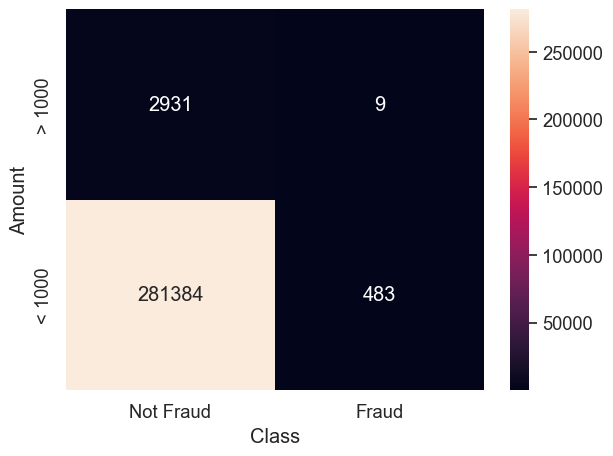

In [15]:
sns.heatmap(cm, annot=True, yticklabels=['< ' + str(transaction_amount_threshold),
                                        '> ' + str(transaction_amount_threshold)], 
                            xticklabels=['Not Fraud', 'Fraud'], fmt='g')
yl = plt.ylabel("Amount")
xl = plt.xlabel("Class")
plt.ylim([0,2])
plt.tight_layout()

## Cross Validation with KFOLD and Hyperparameter Tuning


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)



In [18]:
y_train.value_counts()

0    199017
1       347
Name: Class, dtype: int64

In [19]:
from collections import Counter
Counter(y_train)

Counter({0: 199017, 1: 347})

## Under Sampling

In [20]:
from collections import Counter
Counter(y_train)

Counter({0: 199017, 1: 347})

In [21]:
from imblearn.under_sampling import NearMiss

# Create a NearMiss object
nr = NearMiss(sampling_strategy=0.8)

# Fit and resample the data
X_train_ns, y_train_ns = nr.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199017, 1: 347})
The number of classes after fit Counter({0: 433, 1: 347})


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)

print("\nKNeighborsClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNeighborsClassifier Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNeighborsClassifier Accuracy Score:", accuracy_score(y_test, y_pred_knn))


KNeighborsClassifier Confusion Matrix:
[[ 5596 79702]
 [   11   134]]

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.12     85298
           1       0.00      0.92      0.00       145

    accuracy                           0.07     85443
   macro avg       0.50      0.49      0.06     85443
weighted avg       1.00      0.07      0.12     85443

KNeighborsClassifier Accuracy Score: 0.06706225202766757


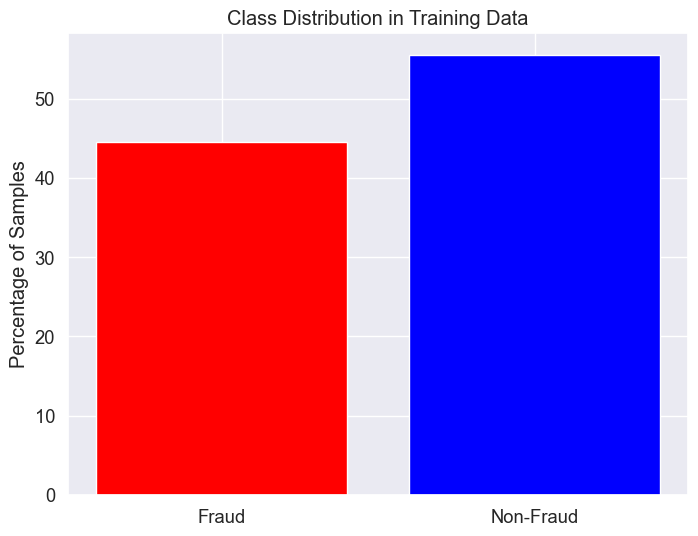

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Sınıf dağılımlarını hesapla
total_samples = len(y_train_ns)
fraud_samples = np.sum(y_train_ns == 1)
non_fraud_samples = np.sum(y_train_ns == 0)

# Yüzde olarak ifade et
fraud_percentage = (fraud_samples / total_samples) * 100
non_fraud_percentage = (non_fraud_samples / total_samples) * 100

# Çubuk grafik oluştur
plt.figure(figsize=(8, 6))
plt.bar(['Fraud', 'Non-Fraud'], [fraud_percentage, non_fraud_percentage], color=['red', 'blue'])
plt.ylabel('Percentage of Samples')
plt.title('Class Distribution in Training Data')
plt.show()

In [25]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[65691 19607]
 [   14   131]]
0.7703615275680863
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     85298
           1       0.01      0.90      0.01       145

    accuracy                           0.77     85443
   macro avg       0.50      0.84      0.44     85443
weighted avg       1.00      0.77      0.87     85443



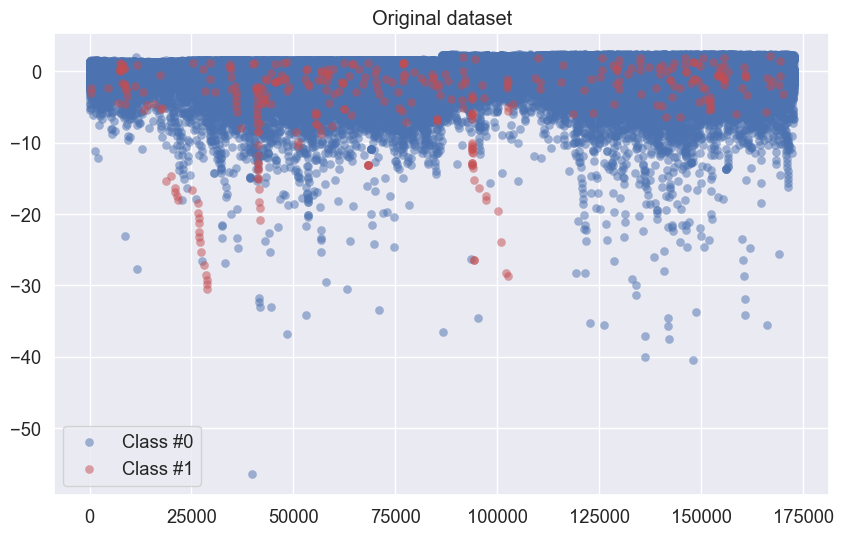

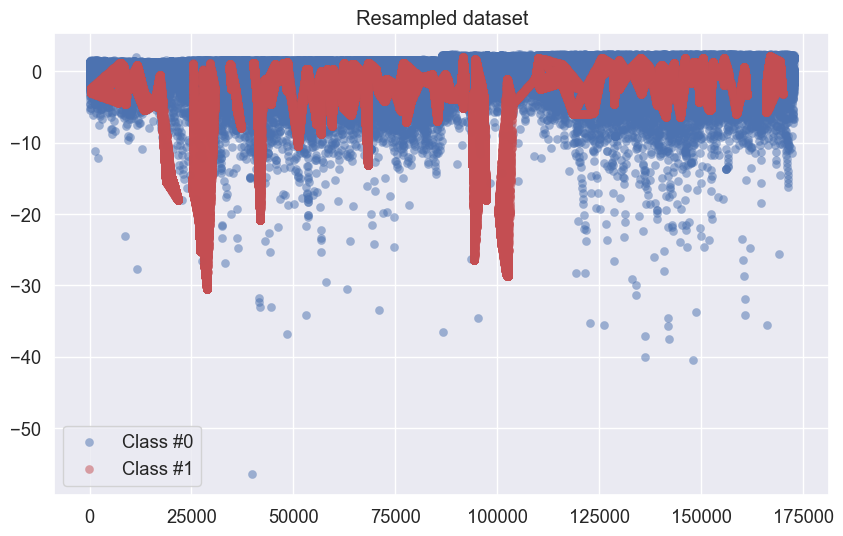

In [26]:
import matplotlib.pyplot as plt

# Original dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Original dataset')
plt.legend()
plt.show()

# Apply SMOTETomek
from imblearn.combine import SMOTETomek
sm = SMOTETomek(sampling_strategy=1)
X_train_ns, y_train_ns = sm.fit_resample(X_train, y_train)

# Resampled dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train_ns[y_train_ns == 0].iloc[:, 0], X_train_ns[y_train_ns == 0].iloc[:, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_train_ns[y_train_ns == 1].iloc[:, 0], X_train_ns[y_train_ns == 1].iloc[:, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Resampled dataset')
plt.legend()
plt.show()